## DASC 550 Project2: House Price Prediction
### [[Sahand]] [[Hassanizorgabad]]
### 0082241

#### Submission Deadline: July 23, 2023 11:59 PM

In this project, you are going to build an end-to-end machine learning solution using a convolutional neural network for house price prediction problem. You should use `tensorflow` library to build your neural network.

The data set is provided in a file called `HD.zip`, which contains 4 images per house and `HousesInfo.txt`. You will predict the price  of each house (given in the last column of `HousesInfo.txt`) using the images provided.

While building your regression model, you should use the randomly selected 80\% as training set and the remaining 20\% as test set. You should report the predictive performances on learning, validation and test sets.

You should also report the metrics you choose to measure the performance of the solution you developed and the reasoning behind your choices.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import pandas as pd

import matplotlib.pyplot as plt

2023-08-31 12:46:53.637573: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def load_house_images(data_path, house_count, image_size):
    house_images = np.zeros((house_count, 2 * image_size[0], 2 * image_size[1], 3),
                             dtype = "uint8")
    for i in range(house_count):
        bathroom = image.load_img("./{}/{}_bathroom.jpg".format(data_path, i + 1),
                                  target_size = image_size)
        house_images[i, 0:image_size[0], 0:image_size[1], :] = bathroom
        bedroom = image.load_img("./{}/{}_bedroom.jpg".format(data_path, i + 1),
                                 target_size = image_size)
        house_images[i, 0:image_size[0], image_size[1]:(2 * image_size[1]), :] = bedroom
        frontal = image.load_img("./{}/{}_frontal.jpg".format(data_path, i + 1),
                                  target_size = image_size)
        house_images[i, image_size[0]:(2 * image_size[0]), 0:image_size[1], :] = frontal
        kitchen = image.load_img("./{}/{}_kitchen.jpg".format(data_path, i + 1),
                                 target_size = image_size)
        house_images[i, image_size[0]:(2 * image_size[0]), image_size[1]:(2 * image_size[1]), :] = kitchen
    return house_images

def load_house_prices(data_path):
    houses_info = np.loadtxt("./{}/HousesInfo.txt".format(data_path))
    return houses_info[:, 4]

In [3]:
house_images = load_house_images("HD", 535, (128, 128))
print(house_images.shape)
type(house_images)

(535, 256, 256, 3)


numpy.ndarray

In [5]:
house_prices = load_house_prices("HD")
print(house_prices.shape)

(535,)


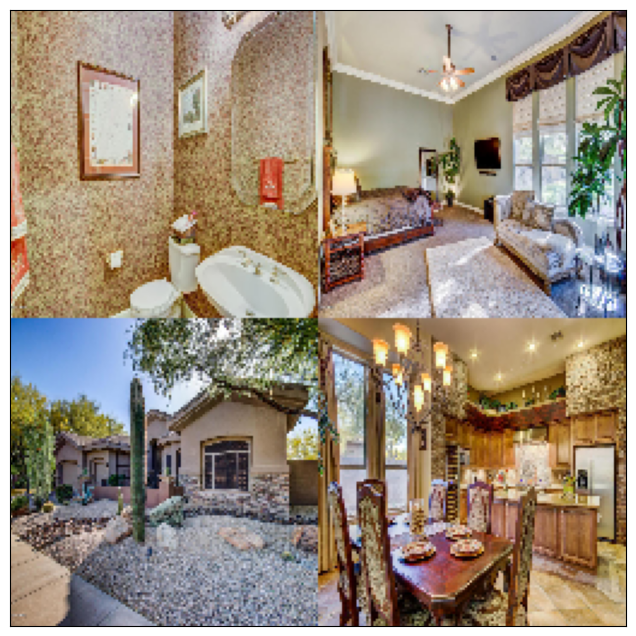

869500.0


In [6]:
#display the first house's picture 
plt.figure(figsize = (8, 8))
plt.imshow(house_images[0, :, :, :])
plt.xticks([])
plt.yticks([])
plt.show()
#display the first house's price 
print(house_prices[0])

In [8]:
from sklearn.model_selection import train_test_split

X = house_images
y = house_prices

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                              random_state = 1234,
                                              shuffle = True,
                                              test_size = 0.2)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(428, 256, 256, 3) (107, 256, 256, 3) (428,) (107,)


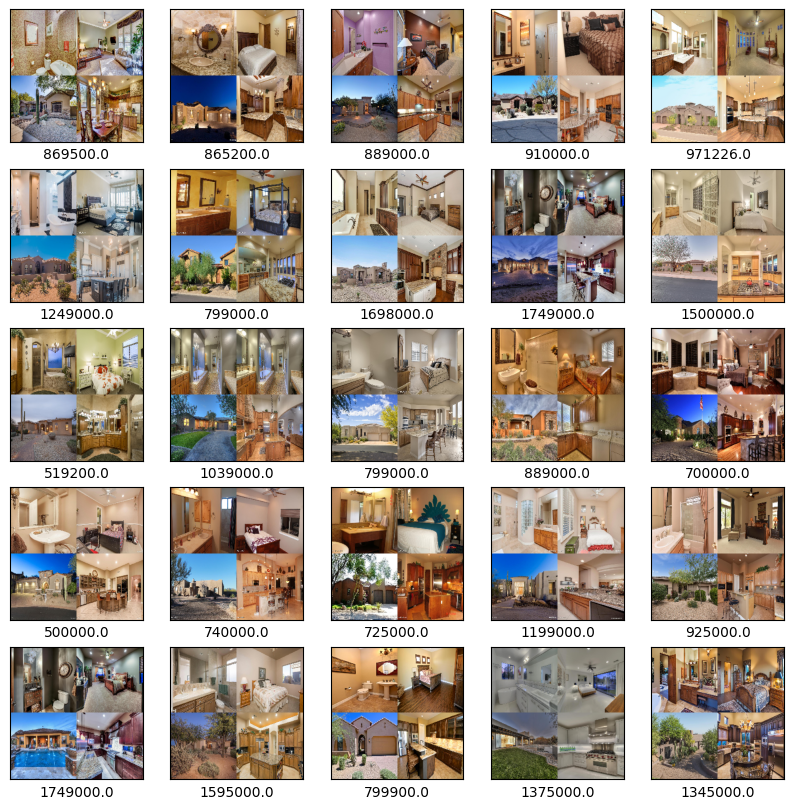

In [9]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i,:,:], cmap = plt.cm.binary)
    plt.xlabel(y[i])
plt.show()

In [10]:
print(np.min(Xtrain),np.max(Xtrain))

0 255


In [11]:
Xlearn, Xval, ylearn, yval = train_test_split(Xtrain, ytrain,
                                              test_size = 1 / 6,
                                              random_state = 1234,
                                              shuffle = True)
print(Xlearn.shape, Xval.shape, ylearn.shape, yval.shape)

(356, 256, 256, 3) (72, 256, 256, 3) (356,) (72,)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_11 (Conv2D)          (None, 126, 126, 32)      2432      
                                                                 
 activation_24 (Activation)  (None, 126, 126, 32)      0         
                                                                 
 batch_normalization_24 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 Conv2D_12 (Conv2D)          (None, 61, 61, 32)        25632     
                                                                 
 activation_25 (Activation)  (None, 61, 61, 32)        0         
                                                                 
 batch_normalization_25 (Bat  (None, 61, 61, 32)       128       
 chNormalization)                                     

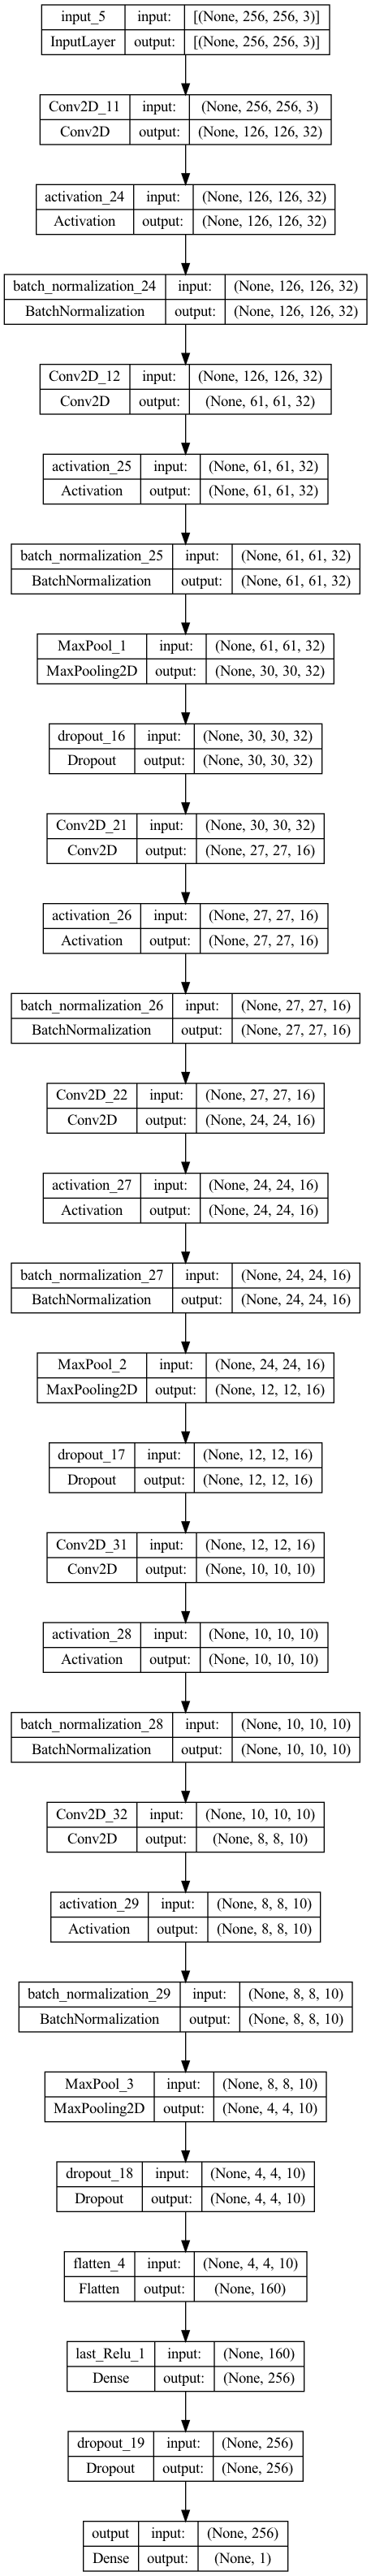

In [62]:
#best CNN model I could make for this problem
CNN_model = keras.models.Sequential([
    keras.layers.Input(shape = (Xlearn.shape[1], 
                                Xlearn.shape[2],
                                Xlearn.shape[3])),
    keras.layers.Conv2D(filters = 32, kernel_size = (5, 5),
                        strides = 2 , name='Conv2D_11'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 32, kernel_size = (5, 5),
                        strides = 2 , name='Conv2D_12'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (2,2), name='MaxPool_1'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(filters = 16, kernel_size = (4, 4),
                        strides = 1 , name='Conv2D_21'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 16, kernel_size = (4, 4),
                        strides = 1 , name='Conv2D_22'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2,2), name='MaxPool_2'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(filters = 10, kernel_size = (3, 3),
                        strides = 1 , name='Conv2D_31'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 10, kernel_size = (3, 3),
                        strides = 1 , name='Conv2D_32'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2,2), name='MaxPool_3'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation = "relu" , name='last_Relu_1'),  
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation = "linear" , name='output')
])

CNN_model.summary()
keras.utils.plot_model(CNN_model, show_shapes = True)

In [14]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'loss',
                                           patience = 20)

CNN_model.compile(optimizer = keras.optimizers.Adam(learning_rate =0.001),
                  loss = "mean_squared_error",
                  metrics = ['mae'])

CNN_history = CNN_model.fit(Xlearn, ylearn, epochs = 200,
                            verbose = 1, 
                            validation_data = (Xval, yval),
                            callbacks = [early_stop])

Epoch 1/200
12/12 [==============================] - 4s 244ms/step - loss: 551004274688.0000 - mae: 571054.4375 - val_loss: 489648685056.0000 - val_mae: 597237.1250
Epoch 2/200
12/12 [==============================] - 3s 230ms/step - loss: 550973407232.0000 - mae: 571028.3750 - val_loss: 489647931392.0000 - val_mae: 597236.7500
Epoch 3/200
12/12 [==============================] - 3s 228ms/step - loss: 550920454144.0000 - mae: 570983.6875 - val_loss: 489648291840.0000 - val_mae: 597236.7500
Epoch 4/200
12/12 [==============================] - 3s 235ms/step - loss: 550846398464.0000 - mae: 570922.2500 - val_loss: 489634365440.0000 - val_mae: 597225.5625
Epoch 5/200
12/12 [==============================] - 3s 249ms/step - loss: 550737936384.0000 - mae: 570837.2500 - val_loss: 489610838016.0000 - val_mae: 597206.6250
Epoch 6/200
12/12 [==============================] - 3s 252ms/step - loss: 550597689344.0000 - mae: 570726.7500 - val_loss: 489552510976.0000 - val_mae: 597161.0000
Epoch 7/20

12/12 [==============================] - 3s 210ms/step - loss: 79584378880.0000 - mae: 172125.2344 - val_loss: 137272786944.0000 - val_mae: 272779.7500
Epoch 100/200
12/12 [==============================] - 2s 206ms/step - loss: 72780996608.0000 - mae: 166725.8438 - val_loss: 143592357888.0000 - val_mae: 276180.2812
Epoch 101/200
12/12 [==============================] - 3s 210ms/step - loss: 59251617792.0000 - mae: 162950.2812 - val_loss: 151475093504.0000 - val_mae: 286278.0000
Epoch 102/200
12/12 [==============================] - 3s 218ms/step - loss: 63545262080.0000 - mae: 157967.4219 - val_loss: 143816556544.0000 - val_mae: 286608.0000
Epoch 103/200
12/12 [==============================] - 2s 203ms/step - loss: 64199495680.0000 - mae: 166590.7656 - val_loss: 133065998336.0000 - val_mae: 275251.0625
Epoch 104/200
12/12 [==============================] - 2s 202ms/step - loss: 71338868736.0000 - mae: 157346.3750 - val_loss: 236058198016.0000 - val_mae: 373825.3438
Epoch 105/200
12/1

In [15]:
print(CNN_model.evaluate(Xlearn, ylearn))
print(CNN_model.evaluate(Xval, yval))
print(CNN_model.evaluate(Xtest, ytest))

12/12 [==============================] - 1s 55ms/step - loss: 26435624960.0000 - mae: 140929.2500
[26435624960.0, 140929.25]
3/3 [==============================] - 0s 38ms/step - loss: 95491252224.0000 - mae: 252793.3594
[95491252224.0, 252793.359375]
4/4 [==============================] - 0s 49ms/step - loss: 429452853248.0000 - mae: 356224.3750
[429452853248.0, 356224.375]


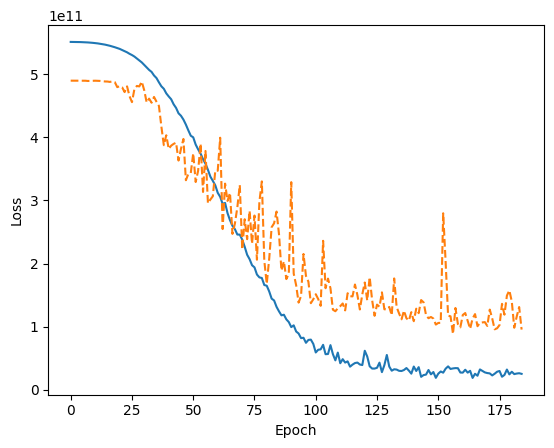

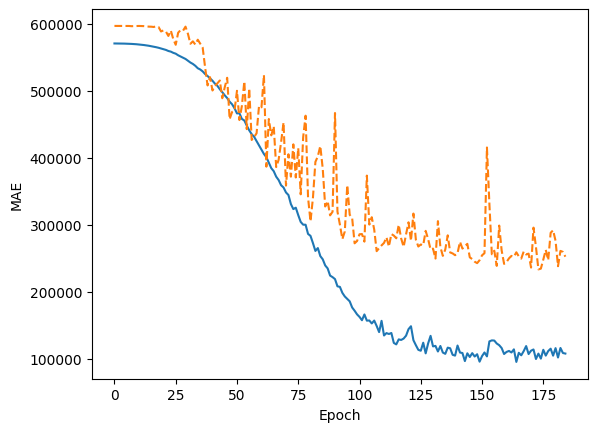

In [16]:
plt.plot(CNN_history.history["loss"])
plt.plot(CNN_history.history["val_loss"], "--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(CNN_history.history["mae"])
plt.plot(CNN_history.history["val_mae"], "--")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.show()

4/4 [==============================] - 0s 45ms/step


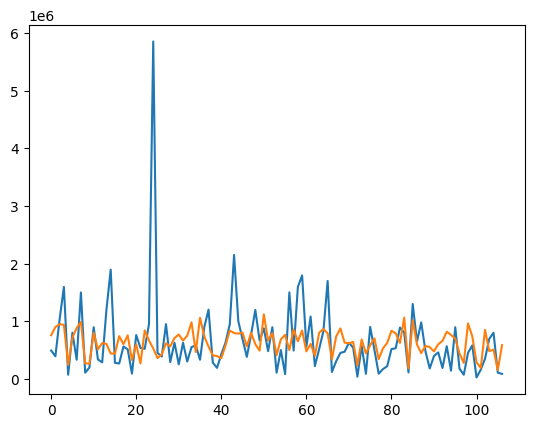

In [17]:
ypred = CNN_model.predict(Xtest)
ypred = ypred.reshape(ypred.shape[0])
plt.plot(range(Xtest.shape[0]),ytest)
plt.plot(range(Xtest.shape[0]),ypred)

14/14 [==============================] - 1s 54ms/step


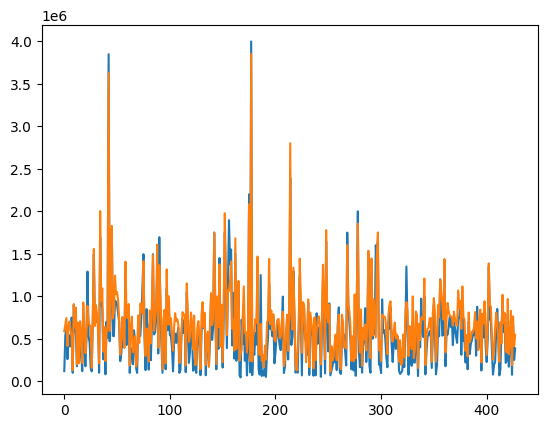

In [18]:
ypredt = CNN_model.predict(Xtrain)
ypredt = ypredt.reshape(ypredt.shape[0])
plt.plot(range(Xtrain.shape[0]),ytrain)
plt.plot(range(Xtrain.shape[0]),ypredt)

In [19]:
dftest = pd.concat([pd.Series(ytest).rename('ytest'),pd.Series(ypred).rename('ypred')] , axis=1)
dftest

ytest          ypred
0     490000.0  754850.500000
1     389900.0  898254.062500
2    1039000.0  948277.875000
3    1595000.0  935778.937500
4      69800.0  239066.546875
..         ...            ...
102   349900.0  847469.312500
103   695000.0  478865.406250
104   799000.0  506599.312500
105   106000.0  151648.109375
106    83900.0  583880.812500

[107 rows x 2 columns]

### Softmax(Extra):

Here i change the regression problem to a multiclass-classification problem by dividing the price into different classes.

In [25]:
print('y Min:',np.min(y) ,'\ny Max:', np.max(y))
label = []

for i in range(21):
    label.append(np.min(y)+ (i* ((np.max(y)-np.min(y) )/ 20)))
    
y_labeled = []

for value in y:
    closest_label = min(label, key=lambda x: abs(x - value))
    y_labeled.append(closest_label)
        
y_labeled = np.array(y_labeled)

unique_values = np.unique(y_labeled)
num_unique_values = len(unique_values)

print("Unique values:", unique_values)
print("Number of unique values:", num_unique_values)

value_to_number = {value: number for number, value in enumerate(unique_values, 1)}

# Map the unique values to numbers
mapped_values = np.array([value_to_number[value] for value in y_labeled])

unique_values = np.unique(mapped_values)
num_unique_values = len(unique_values)
print("Unique values:", unique_values)

y Min: 22000.0 
y Max: 5858000.0
Unique values: [  22000.  313800.  605600.  897400. 1189200. 1481000. 1772800. 2064600.
 2356400. 3815400. 4107200. 5858000.]
Number of unique values: 12
Unique values: [ 1  2  3  4  5  6  7  8  9 10 11 12]


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_11 (Conv2D)          (None, 126, 126, 32)      2432      
                                                                 
 activation_12 (Activation)  (None, 126, 126, 32)      0         
                                                                 
 batch_normalization_12 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 Conv2D_12 (Conv2D)          (None, 61, 61, 32)        25632     
                                                                 
 activation_13 (Activation)  (None, 61, 61, 32)        0         
                                                                 
 batch_normalization_13 (Bat  (None, 61, 61, 32)       128       
 chNormalization)                                     

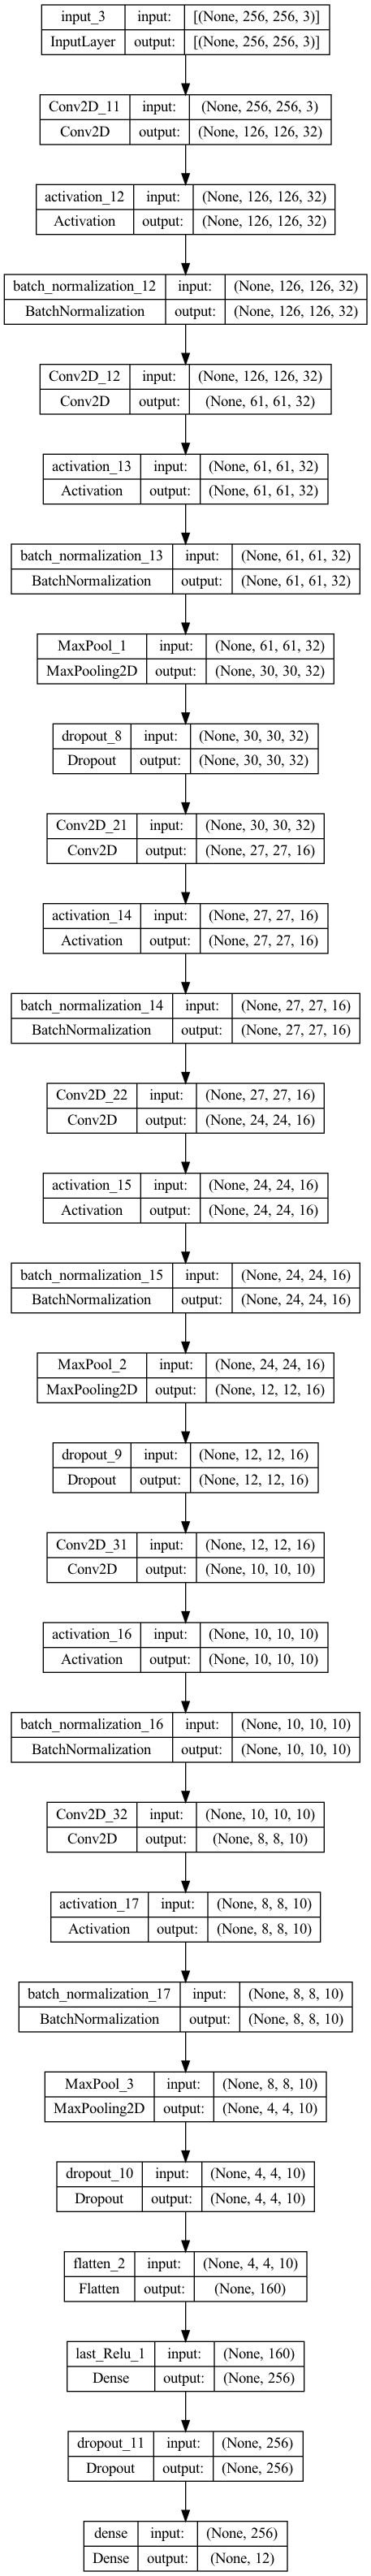

In [26]:
CNN_model2 = keras.models.Sequential([
    keras.layers.Input(shape = (Xlearn.shape[1], 
                                Xlearn.shape[2],
                                Xlearn.shape[3])),
    keras.layers.Conv2D(filters = 32, kernel_size = (5, 5),
                        strides = 2 , name='Conv2D_11'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 32, kernel_size = (5, 5),
                        strides = 2 , name='Conv2D_12'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (2,2), name='MaxPool_1'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(filters = 16, kernel_size = (4, 4),
                        strides = 1 , name='Conv2D_21'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 16, kernel_size = (4, 4),
                        strides = 1 , name='Conv2D_22'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2,2), name='MaxPool_2'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(filters = 10, kernel_size = (3, 3),
                        strides = 1 , name='Conv2D_31'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 10, kernel_size = (3, 3),
                        strides = 1 , name='Conv2D_32'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2,2), name='MaxPool_3'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation = "relu" , name='last_Relu_1'),  
    keras.layers.Dropout(0.4),
    keras.layers.Dense(num_unique_values, activation = "softmax")
])

CNN_model2.summary()
keras.utils.plot_model(CNN_model2, show_shapes = True)

In [35]:
CNN_model2.compile(optimizer = "adam",
                   loss = "sparse_categorical_crossentropy",
                   metrics = ["accuracy"])

In [36]:
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X, mapped_values, 
                                              random_state = 1234,
                                              shuffle = True,
                                              test_size = 0.2)
print(Xtrain2.shape, Xtest2.shape, ytrain2.shape, ytest2.shape)
Xlearn2, Xval2, ylearn2, yval2 = train_test_split(Xtrain2, ytrain2,
                                              test_size = 1 / 6,
                                              random_state = 1234,
                                              shuffle = True)
print(Xlearn2.shape, Xval2.shape, ylearn2.shape, yval2.shape)

(428, 256, 256, 3) (107, 256, 256, 3) (428,) (107,)
(356, 256, 256, 3) (72, 256, 256, 3) (356,) (72,)


In [37]:
# learned network
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                           patience = 150)

cnn_history2 = CNN_model2.fit(Xlearn2, ylearn2, epochs = 200, verbose = 1, 
                              validation_data = (Xval2, yval2),
                              callbacks = [early_stop])

Epoch 1/200
12/12 [==============================] - 3s 231ms/step - loss: 0.7425 - accuracy: 0.7303 - val_loss: 2.3661 - val_accuracy: 0.3194
Epoch 2/200
12/12 [==============================] - 3s 212ms/step - loss: 0.7624 - accuracy: 0.7416 - val_loss: 2.3746 - val_accuracy: 0.3056
Epoch 3/200
12/12 [==============================] - 3s 208ms/step - loss: 0.6421 - accuracy: 0.7388 - val_loss: 2.3015 - val_accuracy: 0.3472
Epoch 4/200
12/12 [==============================] - 2s 208ms/step - loss: 0.6904 - accuracy: 0.7416 - val_loss: 2.1541 - val_accuracy: 0.3194
Epoch 5/200
12/12 [==============================] - 2s 203ms/step - loss: 0.5849 - accuracy: 0.7921 - val_loss: 2.2034 - val_accuracy: 0.2917
Epoch 6/200
12/12 [==============================] - 3s 209ms/step - loss: 0.5482 - accuracy: 0.8062 - val_loss: 2.4974 - val_accuracy: 0.2361
Epoch 7/200
12/12 [==============================] - 2s 199ms/step - loss: 0.5932 - accuracy: 0.7837 - val_loss: 2.5015 - val_accuracy: 0.2778

Epoch 58/200
12/12 [==============================] - 2s 207ms/step - loss: 0.2449 - accuracy: 0.9073 - val_loss: 3.1757 - val_accuracy: 0.3750
Epoch 59/200
12/12 [==============================] - 2s 202ms/step - loss: 0.2488 - accuracy: 0.9242 - val_loss: 3.3500 - val_accuracy: 0.3611
Epoch 60/200
12/12 [==============================] - 2s 207ms/step - loss: 0.1578 - accuracy: 0.9438 - val_loss: 3.2706 - val_accuracy: 0.2917
Epoch 61/200
12/12 [==============================] - 2s 200ms/step - loss: 0.1947 - accuracy: 0.9185 - val_loss: 3.5430 - val_accuracy: 0.3056
Epoch 62/200
12/12 [==============================] - 2s 205ms/step - loss: 0.2035 - accuracy: 0.9354 - val_loss: 3.6078 - val_accuracy: 0.2778
Epoch 63/200
12/12 [==============================] - 2s 207ms/step - loss: 0.2227 - accuracy: 0.9242 - val_loss: 3.8985 - val_accuracy: 0.3472
Epoch 64/200
12/12 [==============================] - 3s 215ms/step - loss: 0.2773 - accuracy: 0.9017 - val_loss: 3.4901 - val_accuracy:

Epoch 115/200
12/12 [==============================] - 3s 225ms/step - loss: 0.1419 - accuracy: 0.9494 - val_loss: 3.5349 - val_accuracy: 0.3472
Epoch 116/200
12/12 [==============================] - 2s 204ms/step - loss: 0.0944 - accuracy: 0.9635 - val_loss: 3.4758 - val_accuracy: 0.3750
Epoch 117/200
12/12 [==============================] - 2s 203ms/step - loss: 0.0975 - accuracy: 0.9691 - val_loss: 3.4866 - val_accuracy: 0.3889
Epoch 118/200
12/12 [==============================] - 3s 212ms/step - loss: 0.0719 - accuracy: 0.9719 - val_loss: 3.4054 - val_accuracy: 0.3750
Epoch 119/200
12/12 [==============================] - 3s 215ms/step - loss: 0.0641 - accuracy: 0.9747 - val_loss: 3.3948 - val_accuracy: 0.3750
Epoch 120/200
12/12 [==============================] - 3s 219ms/step - loss: 0.0758 - accuracy: 0.9691 - val_loss: 3.4133 - val_accuracy: 0.3889
Epoch 121/200
12/12 [==============================] - 3s 210ms/step - loss: 0.0740 - accuracy: 0.9719 - val_loss: 3.3965 - val_ac

In [38]:
print(CNN_model2.evaluate(Xlearn2, ylearn2))
print(CNN_model2.evaluate(Xval2, yval2))

12/12 [==============================] - 1s 52ms/step - loss: 0.0025 - accuracy: 1.0000
[0.0024806095752865076, 1.0]
3/3 [==============================] - 0s 39ms/step - loss: 4.5503 - accuracy: 0.3333
[4.55034875869751, 0.3333333432674408]


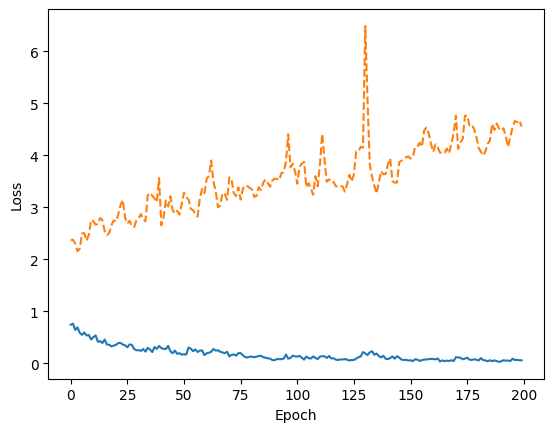

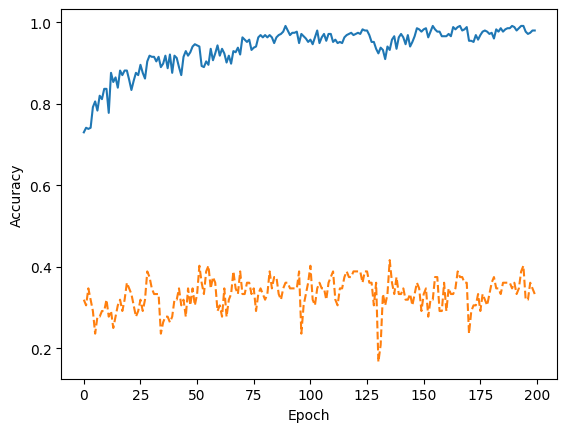

In [39]:
plt.plot(cnn_history2.history["loss"])
plt.plot(cnn_history2.history["val_loss"], "--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(cnn_history2.history["accuracy"])
plt.plot(cnn_history2.history["val_accuracy"], "--")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

4/4 [==============================] - 0s 49ms/step


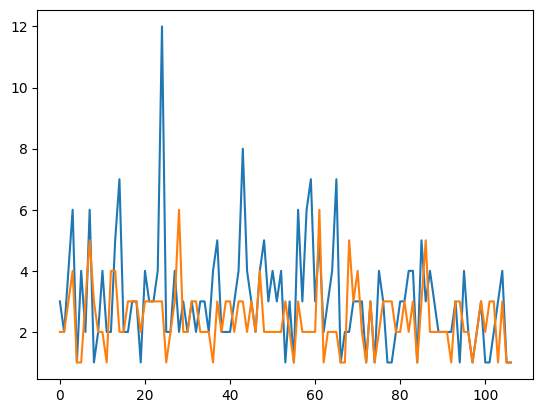

In [40]:
ypred2 = CNN_model2.predict(Xtest2)

ypred2 = np.argmax(ypred2, axis=1)
plt.plot(range(Xtest2.shape[0]),ytest2)
plt.plot(range(Xtest2.shape[0]),ypred2)

14/14 [==============================] - 1s 52ms/step


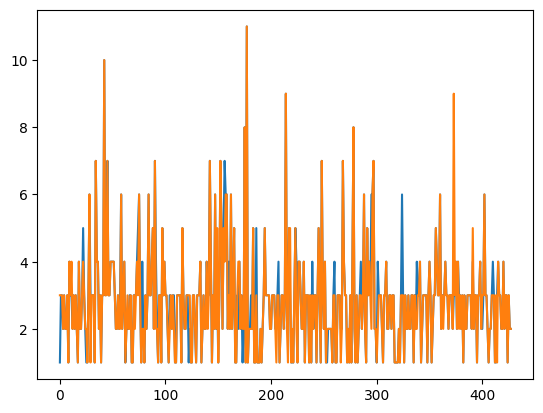

In [41]:
ypredt2 = CNN_model2.predict(Xtrain2)

ypredt2 = np.argmax(ypredt2, axis=1)
plt.plot(range(Xtrain2.shape[0]),ytrain2)
plt.plot(range(Xtrain2.shape[0]),ypredt2)


In [42]:
ypred2_list = []

for i in ytest2:
    ypred2_list.append( ((np.max(y)-np.min(y))/ 5)* i)
    
dftest = pd.concat([pd.Series(ytest).rename('ytest2'),pd.Series(ypred2_list).rename('ypred2')] , axis=1)
dftest

ytest2     ypred2
0     490000.0  3501600.0
1     389900.0  2334400.0
2    1039000.0  4668800.0
3    1595000.0  7003200.0
4      69800.0  1167200.0
..         ...        ...
102   349900.0  2334400.0
103   695000.0  3501600.0
104   799000.0  4668800.0
105   106000.0  1167200.0
106    83900.0  1167200.0

[107 rows x 2 columns]

# Grayscale :

With grayscale i got same results.

(428, 256, 256, 1) (107, 256, 256, 1) (428,) (107,)
(356, 256, 256, 1) (72, 256, 256, 1) (356,) (72,)


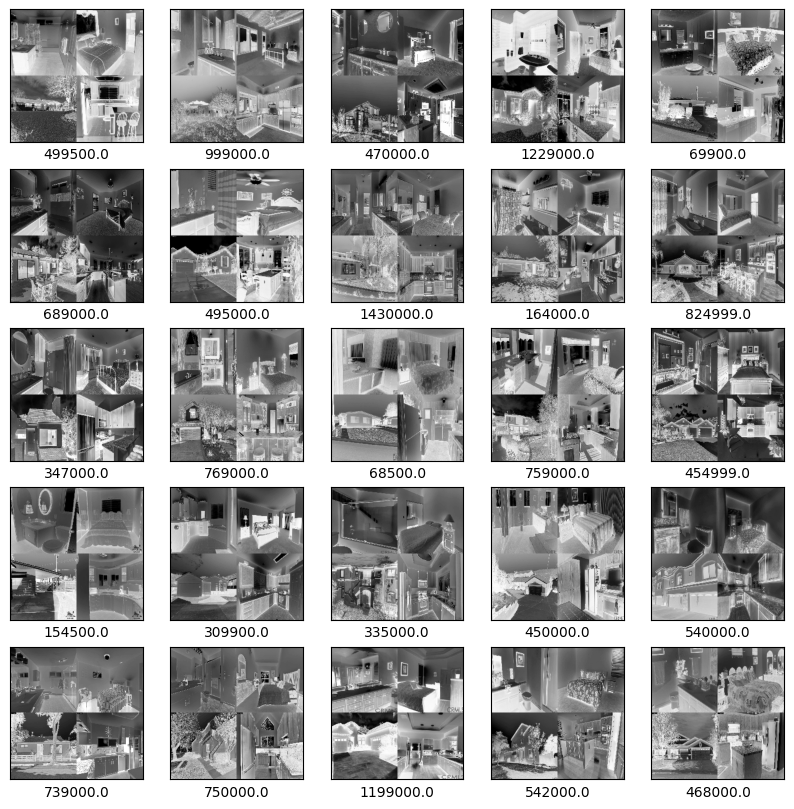

In [57]:
from PIL import Image
import numpy as np

gray_images = [Image.fromarray(np.uint8(image)).convert('L') for image in X]
gray_images = [np.expand_dims(np.array(image), axis=-1) for image in gray_images]
gray_images_array = np.stack(gray_images, axis=0)

Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(gray_images_array, y, 
                                              random_state = 1234,
                                              shuffle = True,
                                              test_size = 0.2)
print(Xtrain3.shape, Xtest3.shape, ytrain3.shape, ytest3.shape)
Xlearn3, Xval3, ylearn3, yval3 = train_test_split(Xtrain3, ytrain3,
                                              test_size = 1 / 6,
                                              random_state = 1234,
                                              shuffle = True)
print(Xlearn3.shape, Xval3.shape, ylearn3.shape, yval3.shape)

plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xlearn3[i,:,:], cmap = plt.cm.binary)
    plt.xlabel(ylearn3[i])
plt.show()

In [70]:
CNN_model3 = keras.models.Sequential([
    keras.layers.Input(shape = (Xlearn3.shape[1], 
                                Xlearn3.shape[2],
                                Xlearn3.shape[3])),
    keras.layers.Conv2D(filters = 32, kernel_size = (5, 5),
                        strides = 2 , name='Conv2D_11'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 32, kernel_size = (5, 5),
                        strides = 2 , name='Conv2D_12'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (2,2), name='MaxPool_1'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(filters = 16, kernel_size = (4, 4),
                        strides = 1 , name='Conv2D_21'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 16, kernel_size = (4, 4),
                        strides = 1 , name='Conv2D_22'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2,2), name='MaxPool_2'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(filters = 10, kernel_size = (3, 3),
                        strides = 1 , name='Conv2D_31'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 10, kernel_size = (3, 3),
                        strides = 1 , name='Conv2D_32'),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2,2), name='MaxPool_3'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation = "relu" , name='last_Relu_1'),  
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation = "linear" , name='output')
])

early_stop = keras.callbacks.EarlyStopping(monitor = 'loss',
                                           patience = 20)

CNN_model3.compile(optimizer = keras.optimizers.Adam(learning_rate =0.001),
                  loss = "mean_squared_error",
                  metrics = ['mae'])

CNN_history3 = CNN_model3.fit(Xlearn3, ylearn3, epochs = 200,
                            verbose = 1, 
                            validation_data = (Xval3, yval3),
                            callbacks = [early_stop])

Epoch 1/200
12/12 [==============================] - 3s 195ms/step - loss: 551009779712.0000 - mae: 571058.9375 - val_loss: 489653141504.0000 - val_mae: 597240.7500
Epoch 2/200
12/12 [==============================] - 2s 188ms/step - loss: 550986317824.0000 - mae: 571038.8125 - val_loss: 489660809216.0000 - val_mae: 597247.2500
Epoch 3/200
12/12 [==============================] - 2s 197ms/step - loss: 550947127296.0000 - mae: 571006.3750 - val_loss: 489654419456.0000 - val_mae: 597242.2500
Epoch 4/200
12/12 [==============================] - 2s 192ms/step - loss: 550890766336.0000 - mae: 570960.3125 - val_loss: 489664479232.0000 - val_mae: 597250.2500
Epoch 5/200
12/12 [==============================] - 2s 185ms/step - loss: 550807470080.0000 - mae: 570889.5625 - val_loss: 489658548224.0000 - val_mae: 597244.6250
Epoch 6/200
12/12 [==============================] - 2s 179ms/step - loss: 550703464448.0000 - mae: 570803.9375 - val_loss: 489661988864.0000 - val_mae: 597247.5625
Epoch 7/20

12/12 [==============================] - 2s 178ms/step - loss: 109324558336.0000 - mae: 224042.5625 - val_loss: 187616935936.0000 - val_mae: 325840.6250
Epoch 100/200
12/12 [==============================] - 2s 178ms/step - loss: 114045984768.0000 - mae: 221661.9062 - val_loss: 131284017152.0000 - val_mae: 284864.6250
Epoch 101/200
12/12 [==============================] - 2s 178ms/step - loss: 100496203776.0000 - mae: 209741.5781 - val_loss: 266382606336.0000 - val_mae: 399666.4688
Epoch 102/200
12/12 [==============================] - 2s 179ms/step - loss: 93652910080.0000 - mae: 204191.0781 - val_loss: 199223689216.0000 - val_mae: 333939.4062
Epoch 103/200
12/12 [==============================] - 2s 178ms/step - loss: 100140490752.0000 - mae: 198317.1406 - val_loss: 193076838400.0000 - val_mae: 325384.6250
Epoch 104/200
12/12 [==============================] - 2s 178ms/step - loss: 87788871680.0000 - mae: 186613.4219 - val_loss: 196732534784.0000 - val_mae: 326980.9062
Epoch 105/200


12/12 [==============================] - 1s 45ms/step - loss: 8962447360.0000 - mae: 71337.9922
[8962447360.0, 71337.9921875]
3/3 [==============================] - 0s 32ms/step - loss: 123658846208.0000 - mae: 258241.8125
[123658846208.0, 258241.8125]
4/4 [==============================] - 0s 47ms/step - loss: 501100118016.0000 - mae: 362339.6562
[501100118016.0, 362339.65625]


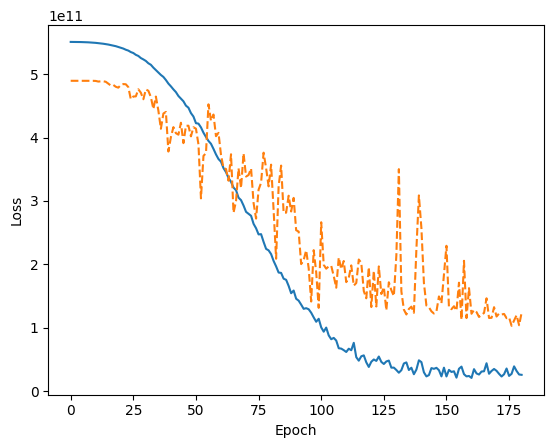

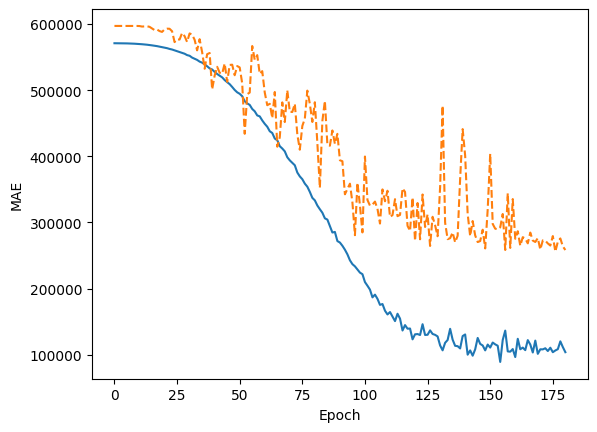

In [71]:
print(CNN_model3.evaluate(Xlearn3, ylearn3))
print(CNN_model3.evaluate(Xval3, yval3))
print(CNN_model3.evaluate(Xtest3, ytest3))

plt.plot(CNN_history3.history["loss"])
plt.plot(CNN_history3.history["val_loss"], "--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(CNN_history3.history["mae"])
plt.plot(CNN_history3.history["val_mae"], "--")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.show()

4/4 [==============================] - 0s 39ms/step


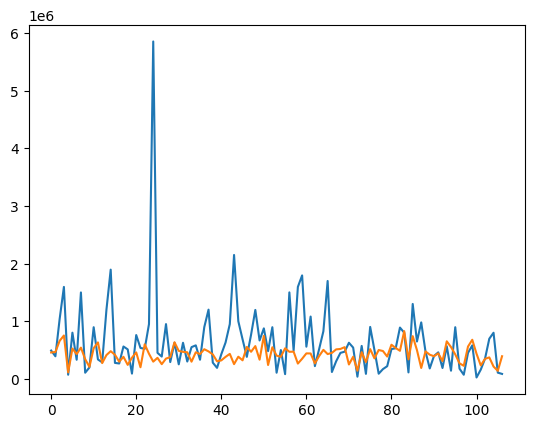

In [72]:
ypred3 = CNN_model3.predict(Xtest3)
ypred3 = ypred3.reshape(ypred3.shape[0])
plt.plot(range(Xtest3.shape[0]),ytest3)
plt.plot(range(Xtest3.shape[0]),ypred3)